In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. Data Loading and Understanding:

In [3]:
df = pd.read_csv('../Assignment 4-Simple Linear Regression/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Basic statistics and information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
# 2. Exploratory Data Analysis (EDA):

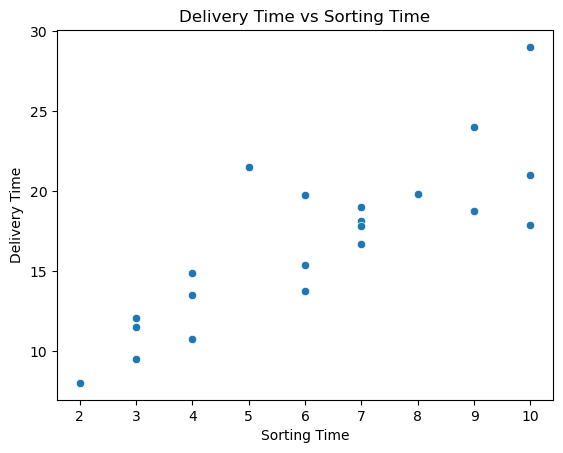

In [7]:
# Scatter plot to visualize the relationship between variables
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs Sorting Time')
plt.show()

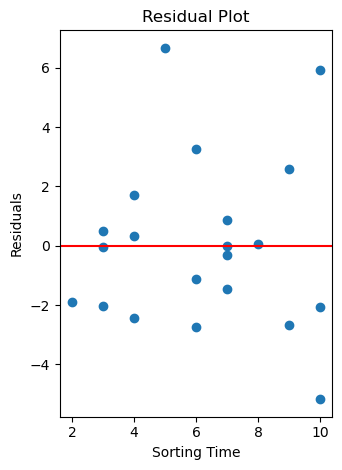

In [8]:
# Residual plot
plt.subplot(1, 2, 2)
residuals = df['Delivery Time'] - np.polyval(np.polyfit(df['Sorting Time'], df['Delivery Time'], 1), df['Sorting Time'])
plt.scatter(df['Sorting Time'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Sorting Time")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [9]:
# Square root transformation for Delivery Time

In [10]:
df['Delivery Time']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [11]:
df['Sqrt_Delivery_Time'] = np.sqrt(df['Delivery Time'])

Text(0, 0.5, 'Square Root of Delivery Time')

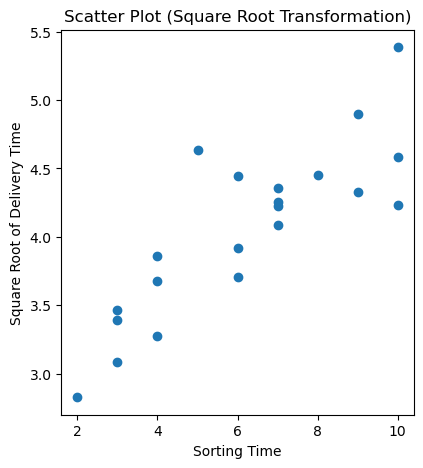

In [12]:
# Scatter plot after transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Sorting Time'], df['Sqrt_Delivery_Time'])
plt.title("Scatter Plot (Square Root Transformation)")
plt.xlabel("Sorting Time")
plt.ylabel("Square Root of Delivery Time")

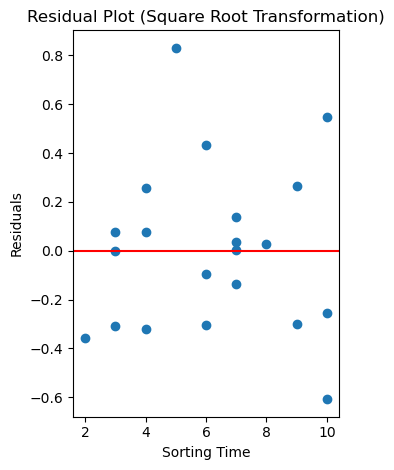

In [13]:
# Residual plot after transformation
plt.subplot(1, 2, 2)
residuals_sqrt = df['Sqrt_Delivery_Time'] - np.polyval(np.polyfit(df['Sorting Time'], df['Sqrt_Delivery_Time'], 1), df['Sorting Time'])
plt.scatter(df['Sorting Time'], residuals_sqrt)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot (Square Root Transformation)")
plt.xlabel("Sorting Time")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [14]:
# 3. Data Preprocessing and Transformation and Model Building:

In [15]:
df.var()

Delivery Time         25.754619
Sorting Time           6.461905
Sqrt_Delivery_Time     0.391879
dtype: float64

In [16]:
df.corr()

,Delivery Time,Sorting Time,Sqrt_Delivery_Time
Delivery Time,1.000000,0.825997,0.995301
Sorting Time,0.825997,1.000000,0.839077
Sqrt_Delivery_Time,0.995301,0.839077,1.000000


In [17]:
df = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

In [18]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Delivery_Time', ylabel='Density'>

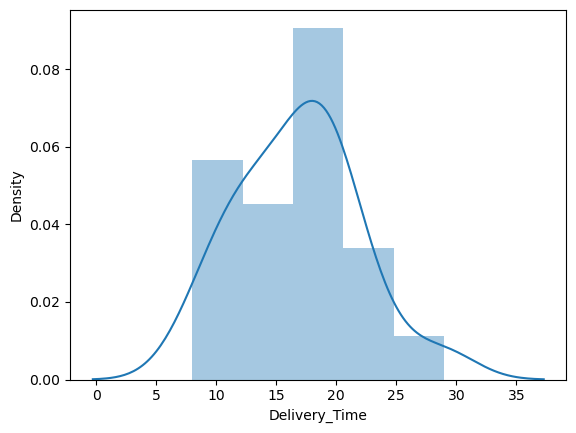

In [19]:
sns.distplot(df['Delivery_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Density'>

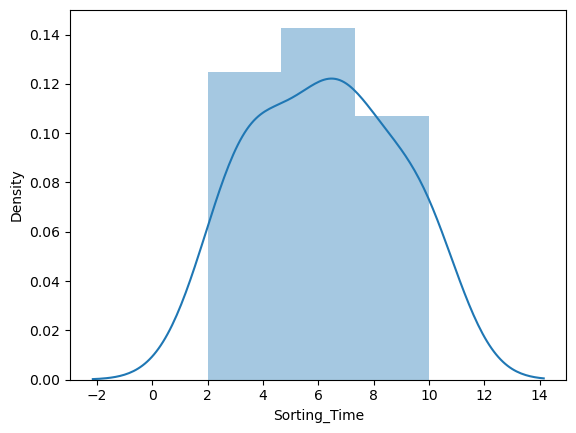

In [20]:
sns.distplot(df['Sorting_Time'])

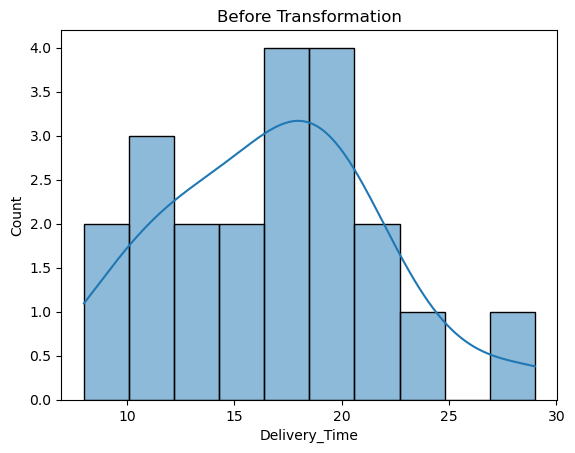

In [21]:
sns.histplot(df['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
plt.show()

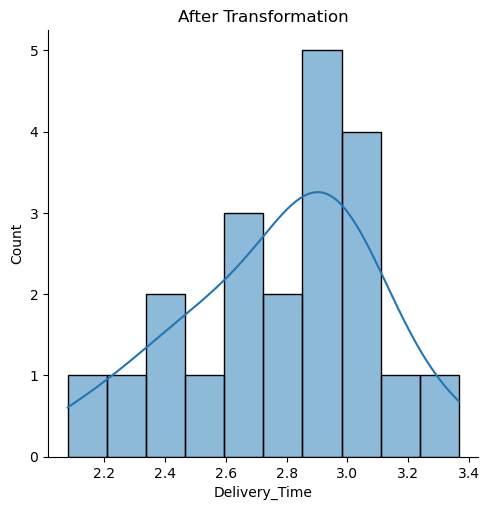

In [22]:
sns.displot(np.log(df['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

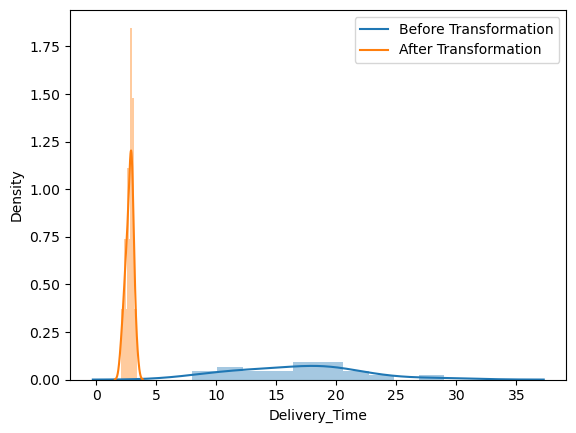

In [23]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery_Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

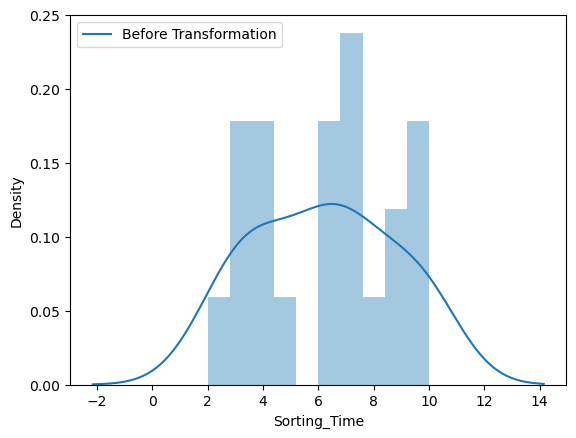

In [24]:
labels = ['Before Transformation']
sns.distplot(df['Sorting_Time'], bins = 10, kde = True)
plt.legend(labels)
plt.show()

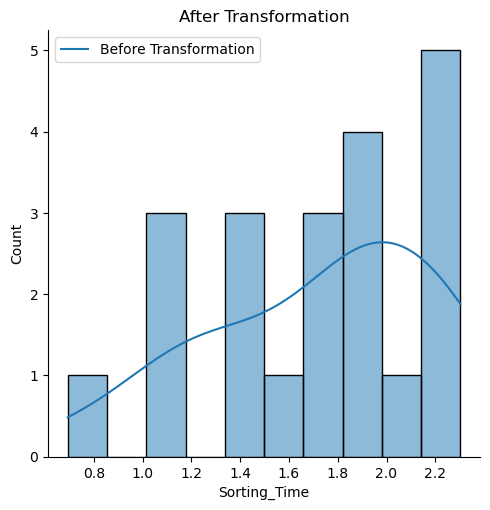

In [25]:
sns.displot(np.log(df['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.legend(labels)
plt.show()

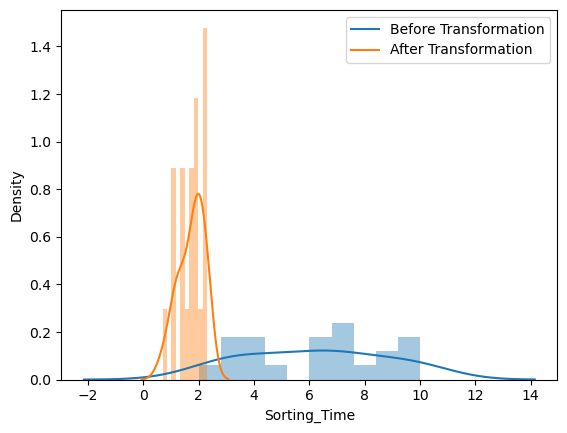

In [26]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting_Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

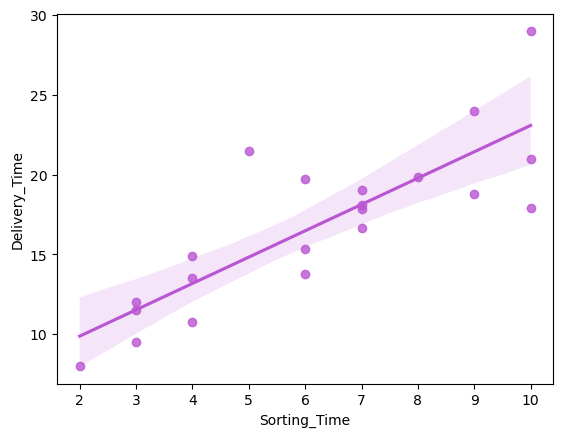

In [27]:
sns.regplot(x=df['Sorting_Time'],y=df['Delivery_Time'], color = 'mediumorchid')
plt.show()

In [28]:
## Fitting a Liner Regression Model
import statsmodels.formula.api as smf
model1 = smf.ols("Delivery_Time~Sorting_Time",data = df).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        16:16:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Model perform metrics coefficient
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [31]:
# t and p vales
print(model1.tvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [32]:
print(model1.pvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [33]:
'Coefficient of determination (R^2):', model1.rsquared

('Coefficient of determination (R^2):', 0.6822714748417231)

In [34]:
'Coefficient of determination (R^2 Adj):', model1.rsquared_adj

('Coefficient of determination (R^2 Adj):', 0.6655489208860244)

In [35]:
model2 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data=df).fit()

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sun, 31 Mar 2024   Prob (F-statistic):           8.48e-07
Time:                            16:16:25   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.params,model2.tvalues,model2.pvalues,model2.rsquared,model2.rsquared_adj

(Intercept                1.613479
 np.sqrt(Sorting_Time)    1.002217
 dtype: float64,
 Intercept                4.628248
 np.sqrt(Sorting_Time)    7.152817
 dtype: float64,
 Intercept                1.833621e-04
 np.sqrt(Sorting_Time)    8.475706e-07
 dtype: float64,
 0.7292011987544664,
 0.7149486302678594)

In [38]:
model3 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data=df).fit()

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sun, 31 Mar 2024   Prob (F-statistic):           4.90e-07
Time:                            16:16:26   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model3.params,model3.tvalues,model3.pvalues,model3.rsquared,model3.rsquared_adj

(Intercept                1.013571
 np.cbrt(Sorting_Time)    0.845585
 dtype: float64,
 Intercept                4.900067
 np.cbrt(Sorting_Time)    7.433210
 dtype: float64,
 Intercept                9.941770e-05
 np.cbrt(Sorting_Time)    4.904127e-07
 dtype: float64,
 0.744116757756627,
 0.7306492186911864)

In [41]:
model4 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data=df).fit()

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 31 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                           16:16:26   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model4.params,model4.tvalues,model4.pvalues,model4.rsquared,model4.rsquared_adj

(Intercept               1.741987
 np.log(Sorting_Time)    0.597522
 dtype: float64,
 Intercept               13.085552
 np.log(Sorting_Time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(Sorting_Time)    1.601539e-07
 dtype: float64,
 0.77216134926874,
 0.7601698413355158)

In [44]:
model3.params,model3.tvalues,model3.pvalues,model3.rsquared,model3.rsquared_adj

(Intercept                1.013571
 np.cbrt(Sorting_Time)    0.845585
 dtype: float64,
 Intercept                4.900067
 np.cbrt(Sorting_Time)    7.433210
 dtype: float64,
 Intercept                9.941770e-05
 np.cbrt(Sorting_Time)    4.904127e-07
 dtype: float64,
 0.744116757756627,
 0.7306492186911864)

In [45]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as smf

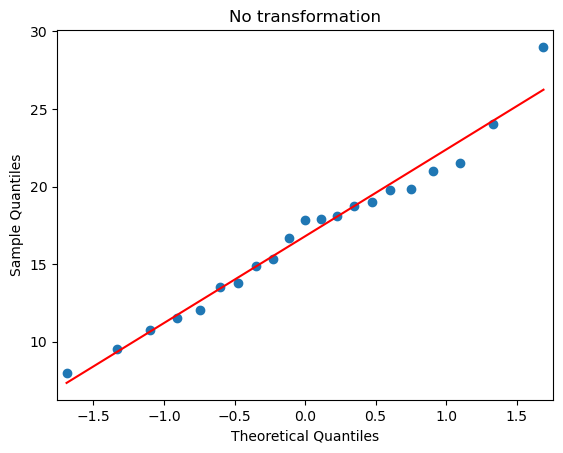

In [46]:
smf.qqplot(df['Delivery_Time'], line = 'r')
plt.title('No transformation')
plt.show()

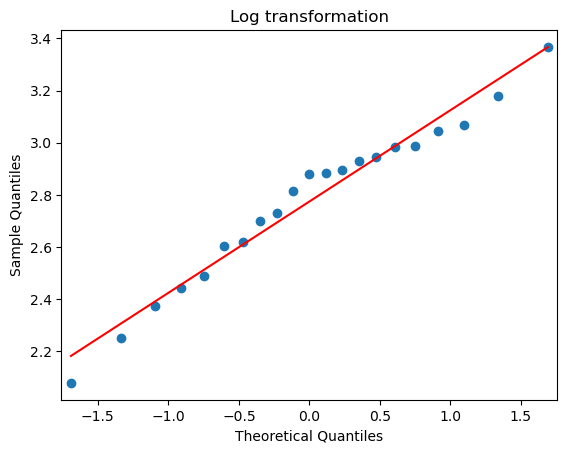

In [47]:
smf.qqplot(np.log(df['Delivery_Time']), line = 'r')
plt.title('Log transformation')
plt.show()

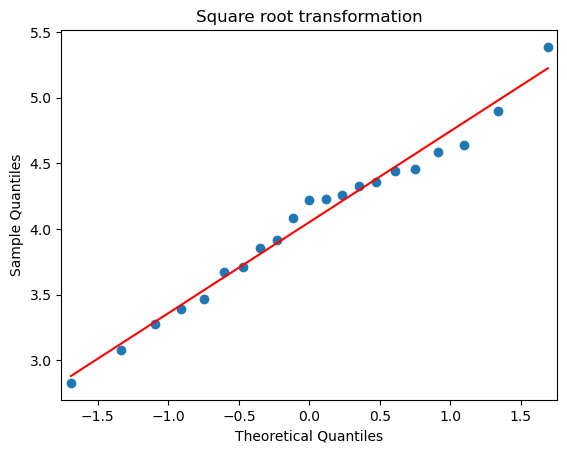

In [48]:
smf.qqplot(np.sqrt(df['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
plt.show()

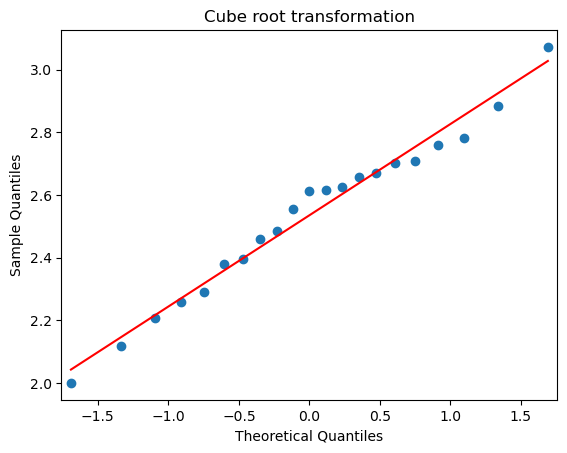

In [49]:
smf.qqplot(np.cbrt(df['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

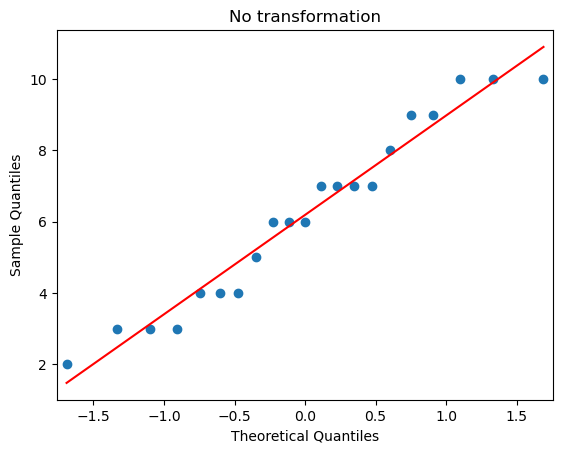

In [50]:
smf.qqplot(df['Sorting_Time'], line = 'r')
plt.title('No transformation')
plt.show()

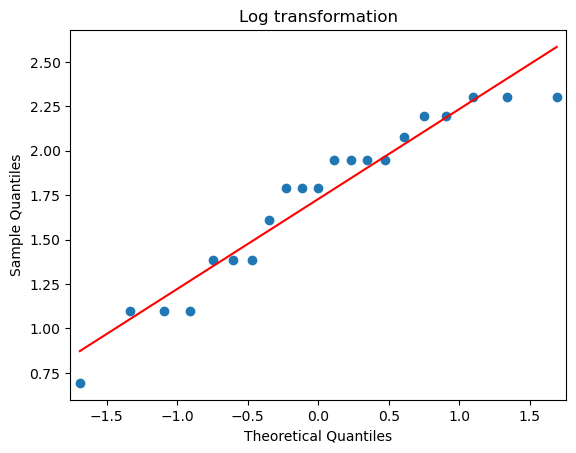

In [51]:
smf.qqplot(np.log(df['Sorting_Time']), line = 'r')
plt.title('Log transformation')
plt.show()

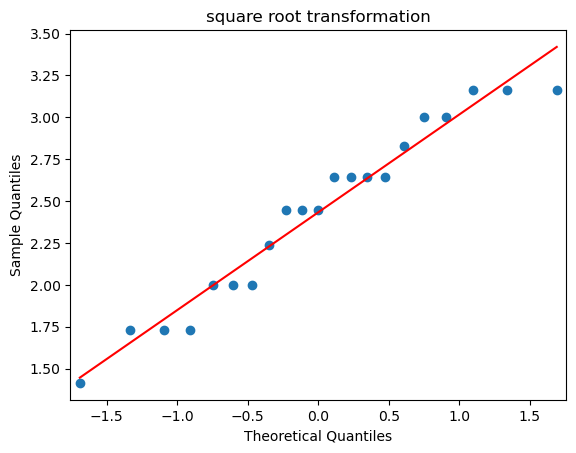

In [52]:
smf.qqplot(np.sqrt(df['Sorting_Time']), line = 'r')
plt.title('square root transformation')
plt.show()

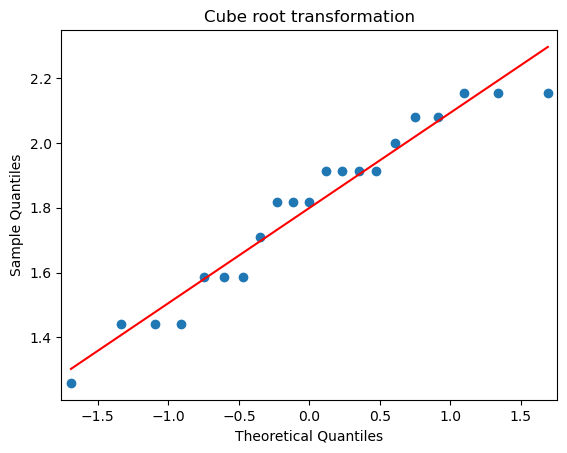

In [53]:
smf.qqplot(np.cbrt(df['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

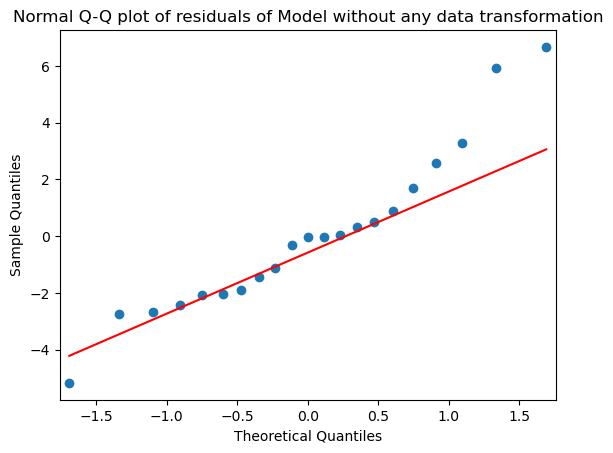

In [54]:
import statsmodels.api as sm
sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

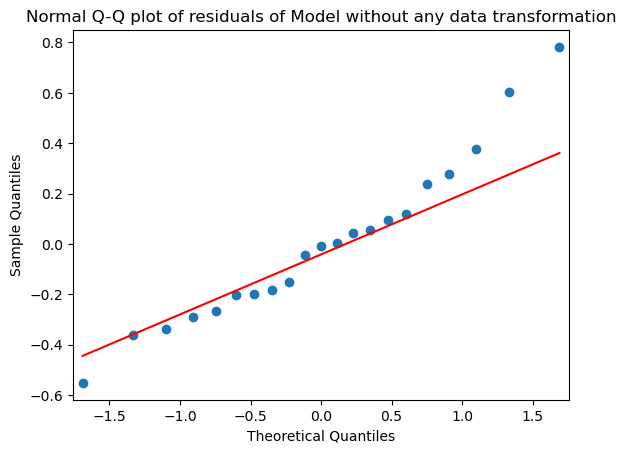

In [55]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [56]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

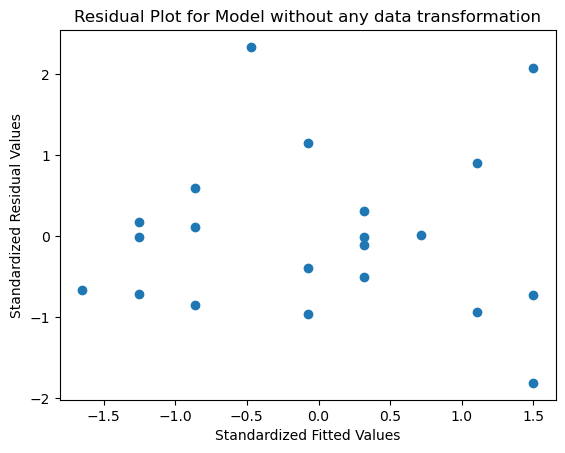

In [57]:
plt.scatter(get_standardized_values(model1.fittedvalues), get_standardized_values(model1.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

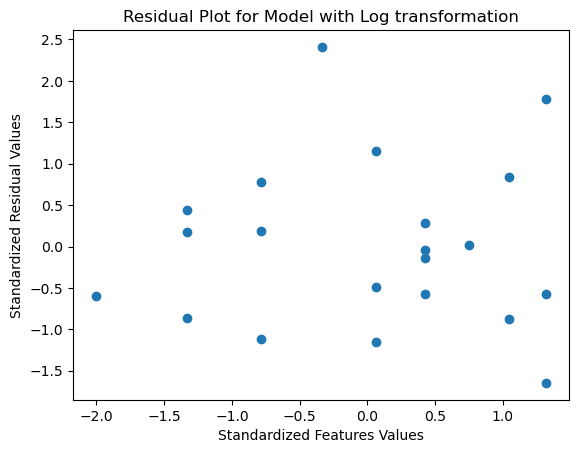

In [58]:
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
model2_pred_y =np.square(model2.predict(df['Sorting_Time']))
model3_pred_y =pow(model3.predict(df['Sorting_Time']),3)
model4_pred_y =np.exp(model4.predict(df['Sorting_Time']))
### model1_pred_y =np.exp(model1.predict(df['Sorting_Time']))

In [61]:
model2_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model3_pred_y))
model4_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model4_pred_y))
print('model1=', np.sqrt(model1.mse_resid),'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse,'\n' 'model4=', model4_rmse)

model1= 2.9349037688901394 
model2= 2.762294279320867 
model3= 2.755584309893575 
model4= 2.7458288976145497


In [62]:
data = {'model': np.sqrt(model1.mse_resid), 'model1': model2_rmse, 'model2': model2_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model3'

In [63]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model3.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [64]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df.Sorting_Time
predicted1['Delivery_Time'] = df.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model1.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
